In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("Heart_disease.csv")
data.head()

,age,sex,cp,restbp,chol,fbs,restecg,maxhr,exang,oldpeak,slope,mv,thal,diagnosis
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
data['disease'] = np.where(data['diagnosis']>0,1,0)
data.rename(columns={'diagnosis':'diag'},inplace= True)

In [4]:
data.head()

,age,sex,cp,restbp,chol,fbs,restecg,maxhr,exang,oldpeak,slope,mv,thal,diag,disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   restbp   303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   restecg  303 non-null    int64  
 7   maxhr    303 non-null    int64  
 8   exang    303 non-null    int64  
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    int64  
 11  mv       299 non-null    float64
 12  thal     301 non-null    float64
 13  diag     303 non-null    int64  
 14  disease  303 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 35.6 KB


In [6]:
data.isnull().to_numpy().any()

True

<AxesSubplot:>

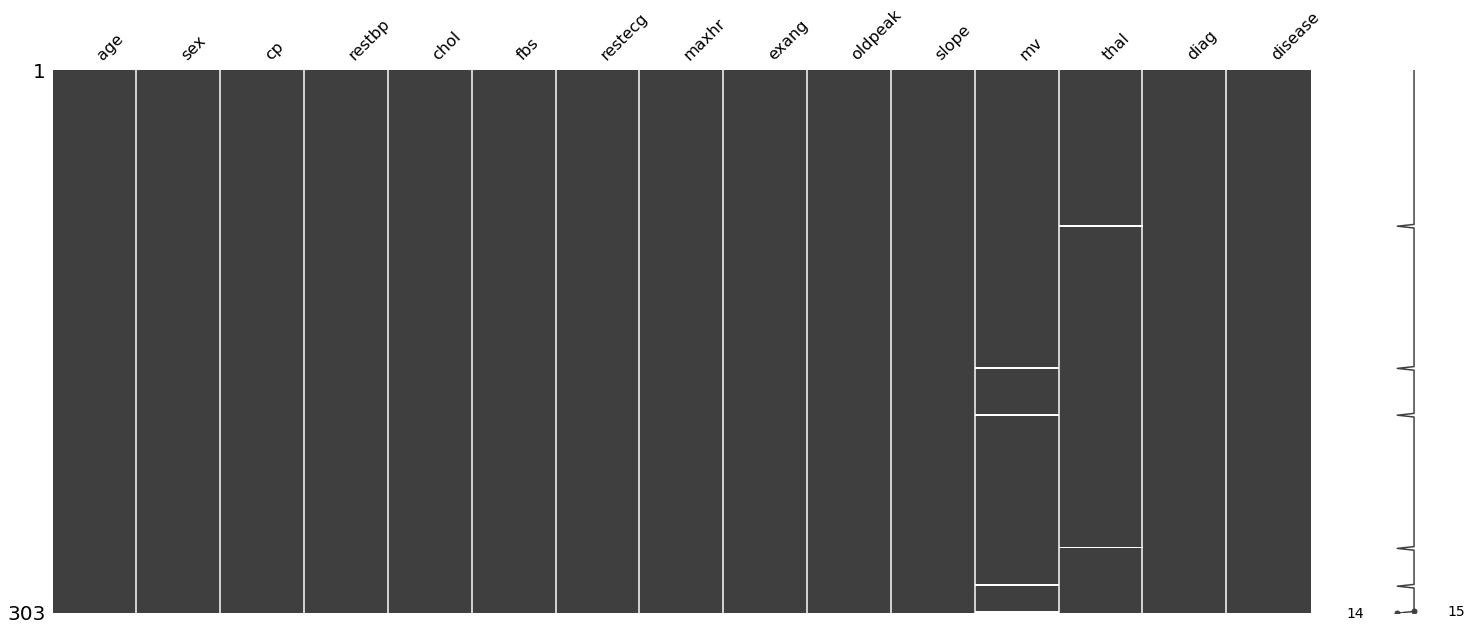

In [7]:
import missingno as msno

msno.matrix(data)

In [8]:
data = data.fillna(data.median())

In [9]:
#check for the duplicate rows
duplicated = data.duplicated().sum()
if duplicated:
    print('Duplicates Rows in DataSet are: {}'.format(duplicated))
else:
    print('Dataset contains no Duplicate Values')


Dataset contains no Duplicate Values


In [10]:
data.describe()

,age,sex,cp,restbp,chol,fbs,restecg,maxhr,exang,oldpeak,slope,mv,thal,diag,disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.000000


# EDA Analysis 

Text(0.5, 1.0, 'Heart Disease')

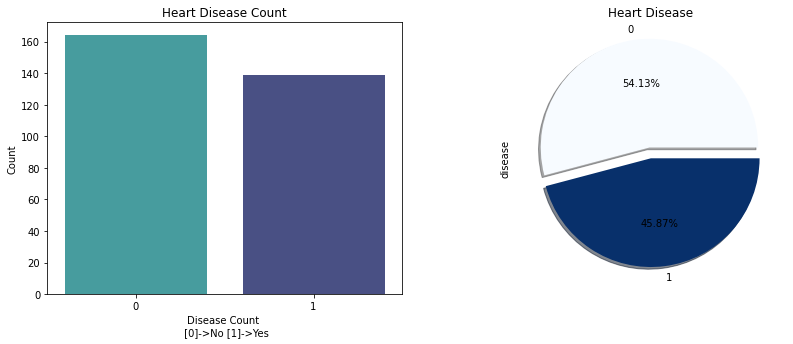

In [11]:
fig,ax=plt.subplots(1, 2, figsize = (14,5))
sns.countplot(data=data, x='disease', ax=ax[0],palette='mako_r')
ax[0].set_xlabel("Disease Count \n [0]->No [1]->Yes")
ax[0].set_ylabel("Count")
ax[0].set_title("Heart Disease Count")
data['disease'].value_counts().plot.pie(explode=[0.1,0.0],autopct='%1.2f%%',ax=ax[1],shadow=True, cmap='Blues')
plt.title("Heart Disease")

Text(0.5, 1.0, '0 ->Female , 1 -> Male')

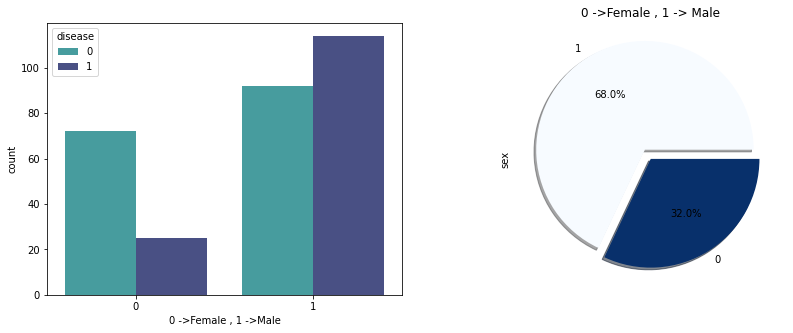

In [12]:
#sex attribute
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='sex',data=data,hue='disease',palette='mako_r',ax=ax[0])
ax[0].set_xlabel("0 ->Female , 1 ->Male")
data.sex.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0], cmap='Blues')
ax[1].set_title("0 ->Female , 1 -> Male")

Text(0.5, 1.0, '0 -> fps <120 , 1 -> fps>120')

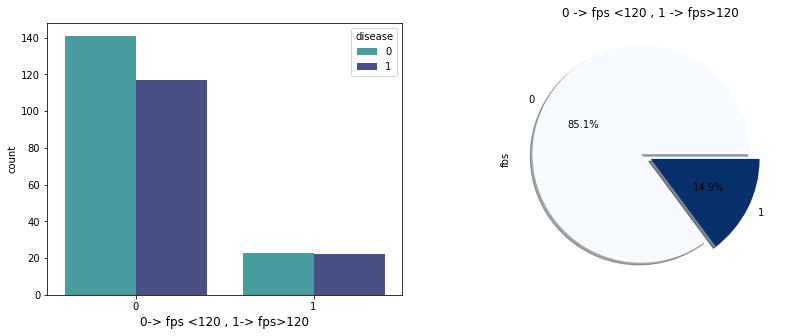

In [13]:
#fasting blood Sugar (FBS)
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='fbs',data=data,hue='disease',palette='mako_r',ax=ax[0])
ax[0].set_xlabel("0-> fps <120 , 1-> fps>120",size=12)
data.fbs.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0],cmap='Blues')
ax[1].set_title("0 -> fps <120 , 1 -> fps>120",size=12)

Text(0.5, 1.0, 'resting electrocardiographic')

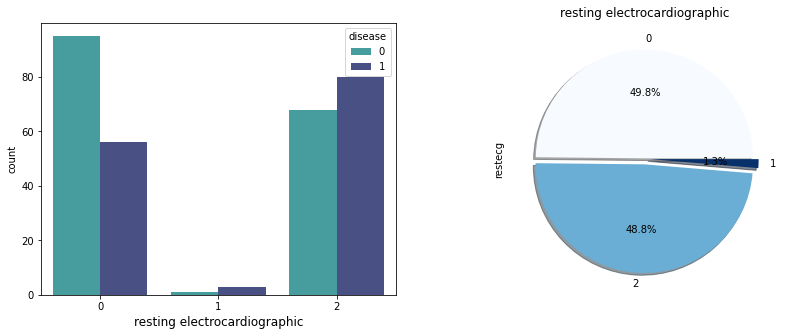

In [14]:
#ECG
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='restecg',data=data,hue='disease',palette='mako_r',ax=ax[0])
ax[0].set_xlabel("resting electrocardiographic",size=12)
data.restecg.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,
                                     explode=[0.005,0.05,0.05],cmap='Blues')
ax[1].set_title("resting electrocardiographic",size=12)

Text(0.5, 1.0, 'peak exercise ST segment ')

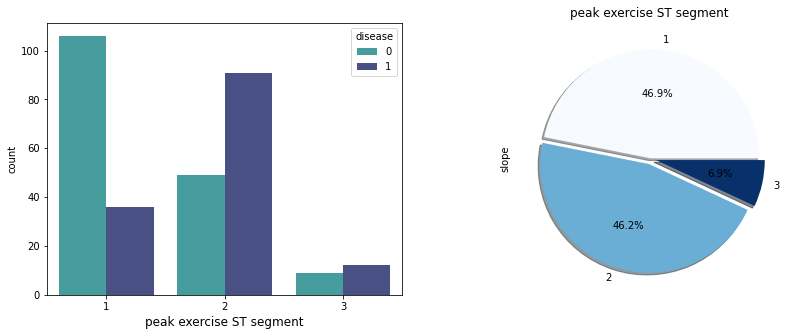

In [15]:
#slope
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='slope',data=data,hue='disease',palette='mako_r',ax=ax[0])
ax[0].set_xlabel("peak exercise ST segment",size=12)
data.slope.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,explode=[0.005,0.05,0.05],cmap='Blues')

ax[1].set_title("peak exercise ST segment ",size=12)

Text(0.5, 1.0, 'number of major vessels colored by flourosopy')

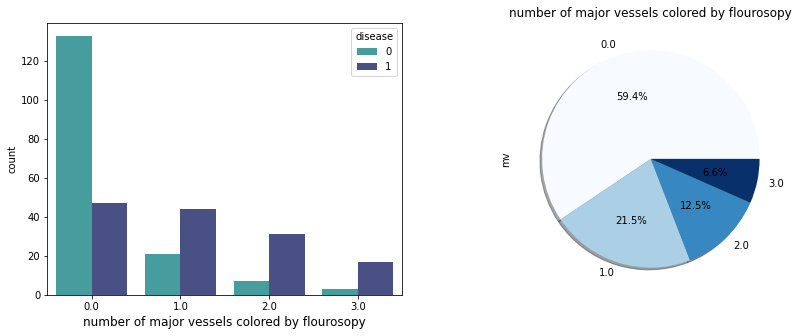

In [16]:
#mv

fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='mv',data=data,hue='disease',palette='mako_r',ax=ax[0])
ax[0].set_xlabel("number of major vessels colored by flourosopy",size=12)
data.mv.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,cmap='Blues')
ax[1].set_title("number of major vessels colored by flourosopy",size=12)

Text(0.5, 1.0, 'thal')

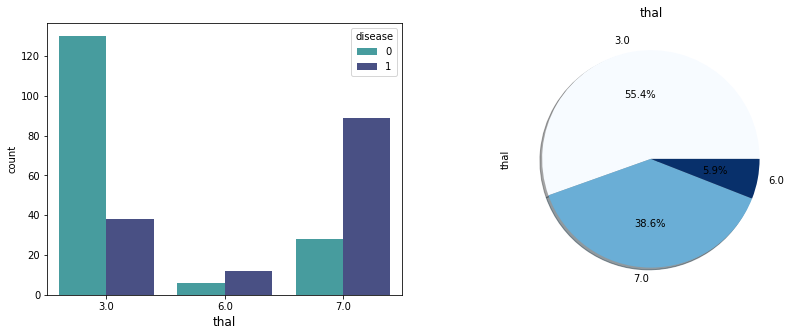

In [17]:
#thal
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='thal',data=data,hue='disease',palette='mako_r',ax=ax[0])
ax[0].set_xlabel("thal",size=12)
data.thal.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,cmap='Blues')
ax[1].set_title("thal",size=12)

Text(0.5, 1.0, 'Chest pain')

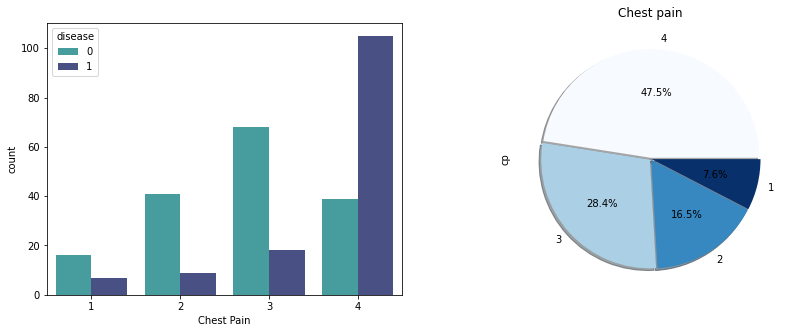

In [18]:
#chestpain

fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='cp',data=data,hue='disease',palette='mako_r',ax=ax[0])
ax[0].set_xlabel("Chest Pain")
data.cp.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0.01,0.01,0.01,0.01],shadow=True, cmap='Blues')
ax[1].set_title("Chest pain")

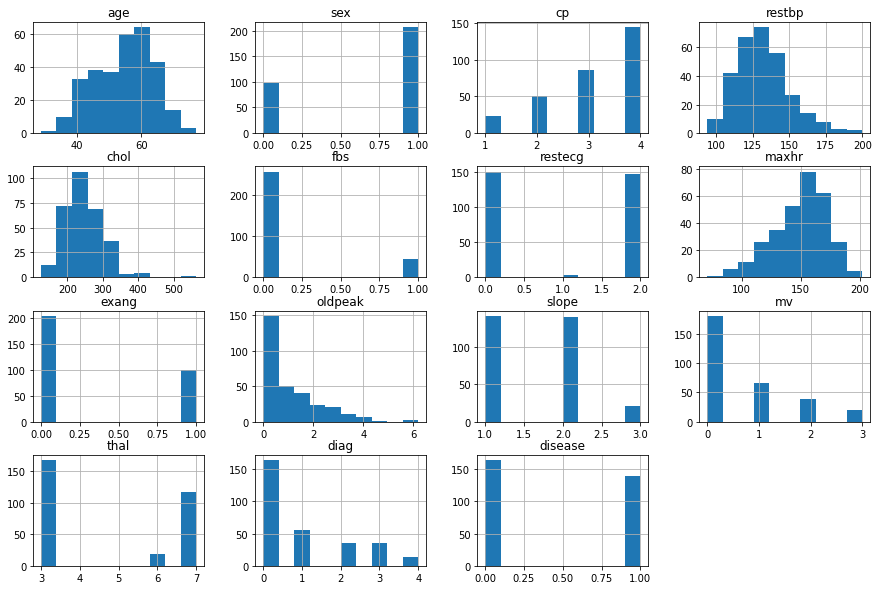

In [19]:
#histogram
data.hist(figsize=(15,10))
plt.show()

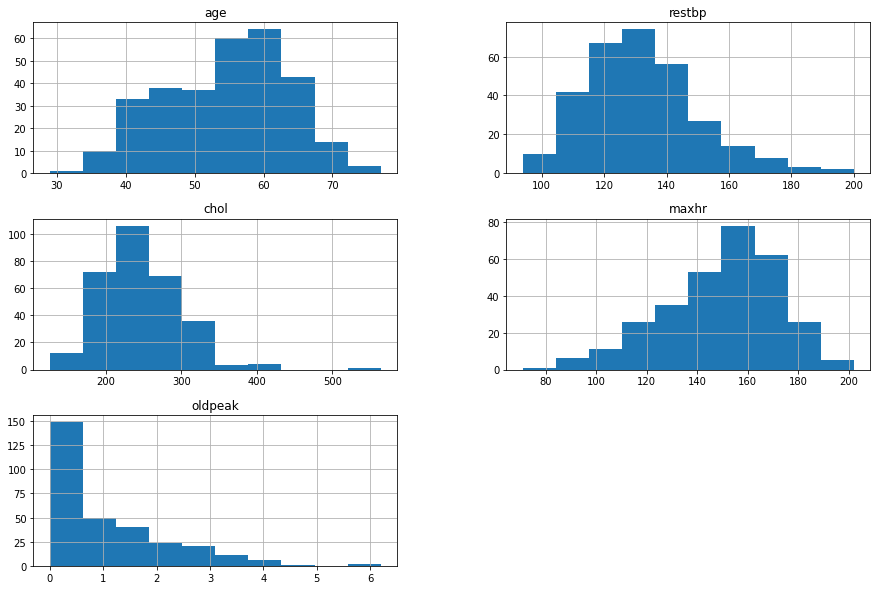

In [20]:
#distribution plot on continous variables
continous_features = ['age','restbp','chol','maxhr','oldpeak']
data.hist(continous_features,figsize=(15,10))
plt.show()


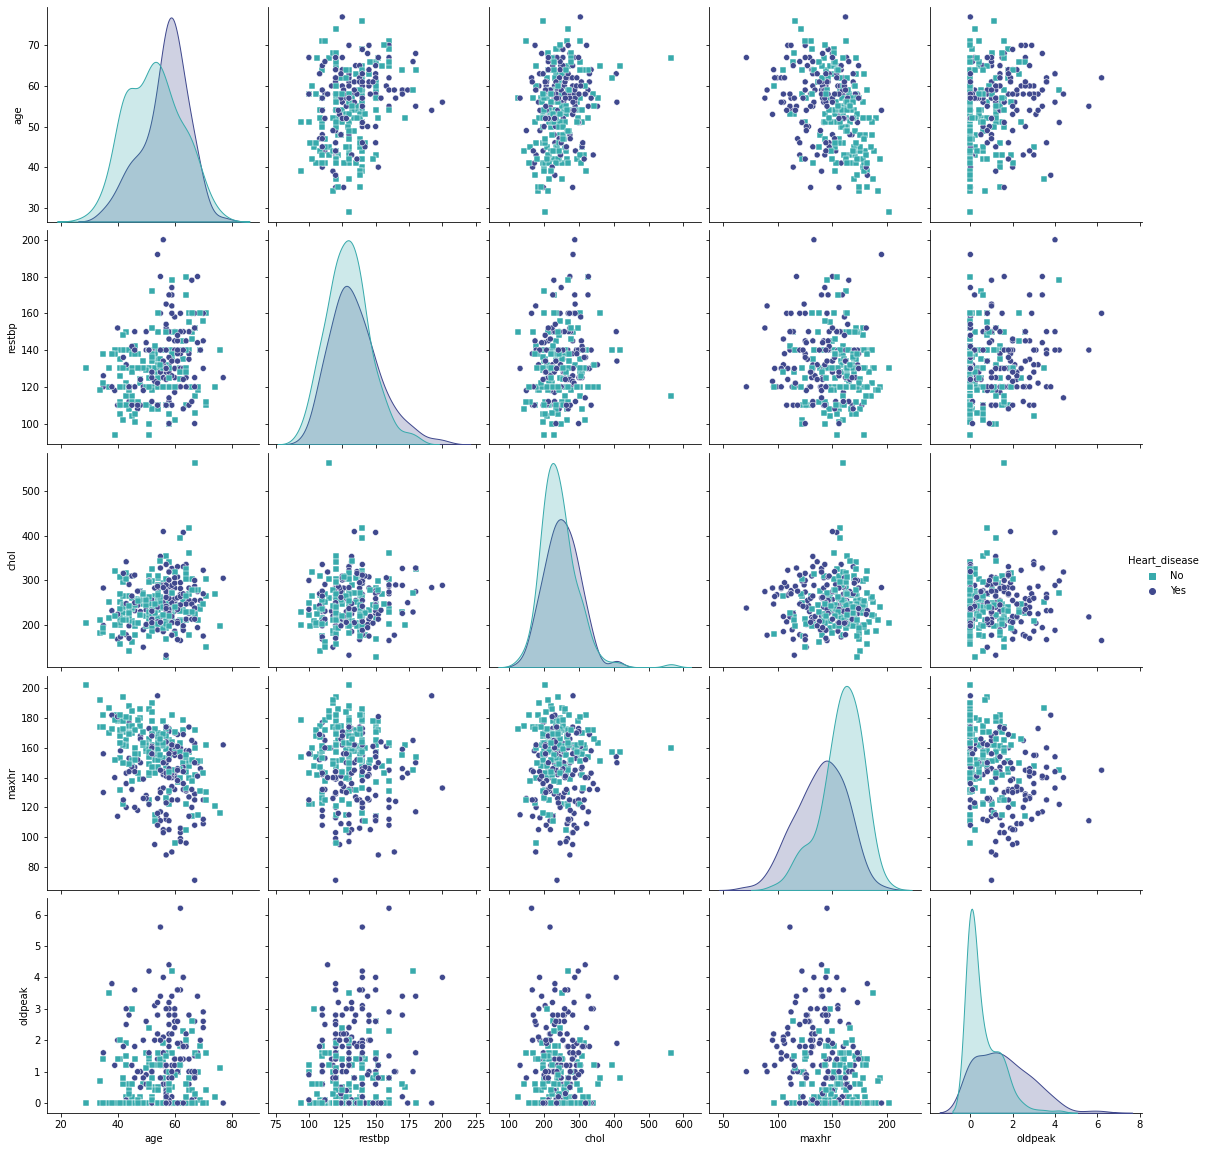

In [21]:
#pair plot to visulaize the distribution


#Shows relationship between variables by target variable 
g = sns.pairplot(data,palette='mako_r', height=3.25, hue='disease',markers=['s','o'], vars=['age','restbp','chol','maxhr','oldpeak'])

#replace legend title
new_title = 'Heart_disease'
g._legend.set_title(new_title)

#replace legend labels
new_labels = ['No','Yes']
for t, l in zip(g._legend.texts, new_labels): 
    t.set_text(l)
plt.show()  

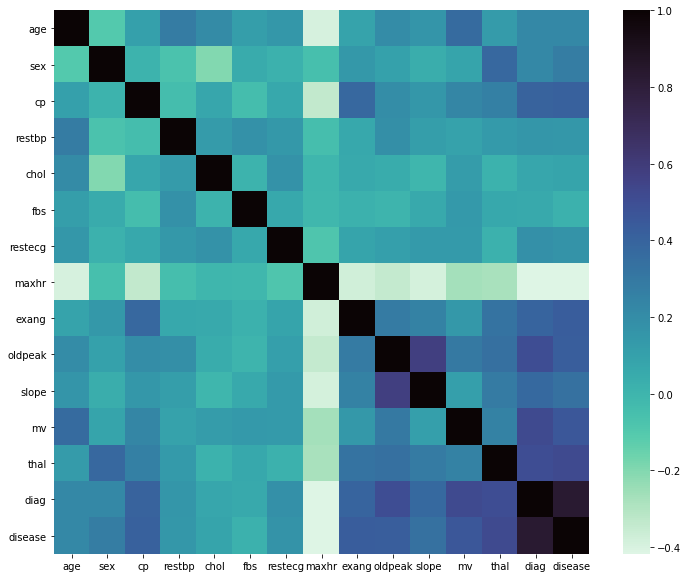

In [22]:
#correlation matrix

f, ax = plt.subplots(figsize=(12, 10))
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap="mako_r")
plt.show()


In [23]:
#function to list all the outliers
continous_features = ['age','restbp','chol','maxhr','oldpeak']
def outliers(data_out, drop = False):
    for each_features in data_out.columns:
        feature_data = data_out[each_features]
        q1 = np.percentile(feature_data, 25.)
        q3 = np.percentile(feature_data, 75.)
        
        IQR = q3-q1
        
        outlier_step = IQR * 1.5
        
        outliers = feature_data[~((feature_data >= q1-outlier_step) & (feature_data <= q3 + outlier_step))].index.tolist()
        
        if not drop:
            print('For the feature {}, No. of outliers is {}'.format(each_features, len(outliers)))
        
        if drop:
            data.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_features))

outliers(data[continous_features])

For the feature age, No. of outliers is 0
For the feature restbp, No. of outliers is 9
For the feature chol, No. of outliers is 5
For the feature maxhr, No. of outliers is 1
For the feature oldpeak, No. of outliers is 5


In [24]:
#drop the outliers
outliers(data[continous_features], drop = True)

Outliers from age feature removed
Outliers from restbp feature removed
Outliers from chol feature removed
Outliers from maxhr feature removed
Outliers from oldpeak feature removed


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier     
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.linear_model import SGDClassifier

In [26]:
#import other dependent libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image
from sklearn import metrics
from io import StringIO
import pydotplus
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [27]:
features = ['age','sex','cp','restbp','chol','fbs','restecg','maxhr','exang','oldpeak','slope','mv','thal']

X= data[features]
Y= data['disease']

In [28]:
#splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
#splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [31]:
#model fitting

# 1) Decision Tree

dtree_1 = tree.DecisionTreeClassifier()
dtree_1.fit(X_train,Y_train)
y_pred = dtree_1.predict(X_test)

In [32]:
#splitting data#model performance
count_misclassified = (Y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(Y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 14
Accuracy: 0.75


In [33]:
#KNN Models fitting

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn = knn.predict(X_test)

In [34]:
print(confusion_matrix(Y_test, Y_pred_knn))
print(classification_report(Y_test, Y_pred_knn))

[[26 16]
 [ 5 10]]
              precision    recall  f1-score   support

           0       0.84      0.62      0.71        42
           1       0.38      0.67      0.49        15

    accuracy                           0.63        57
   macro avg       0.61      0.64      0.60        57
weighted avg       0.72      0.63      0.65        57



In [35]:
accuracy = metrics.accuracy_score(Y_test, Y_pred_knn)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.63


In [36]:
#accuracy from neighbors 1 to 20

accuracy = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred_knn = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred_knn))
    
print(accuracy)
print()
max_accuracy = max(accuracy)
print(max_accuracy)
print()
print(accuracy.index(max_accuracy)+1)

[0.5964912280701754, 0.631578947368421, 0.6140350877192983, 0.6666666666666666, 0.6491228070175439, 0.6842105263157895, 0.631578947368421, 0.631578947368421, 0.6140350877192983, 0.6666666666666666, 0.631578947368421, 0.631578947368421, 0.631578947368421, 0.6491228070175439, 0.6491228070175439, 0.6491228070175439, 0.631578947368421, 0.631578947368421, 0.6491228070175439, 0.6842105263157895]

0.6842105263157895

6


In [37]:
error = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred_knn = knn.predict(X_test)
    error.append(np.mean(Y_pred_knn != Y_test))

Text(0, 0.5, 'Mean error')

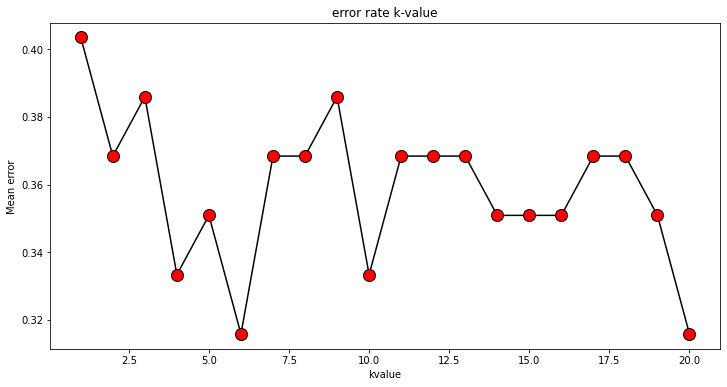

In [38]:
plt.figure(figsize=(12,6))
plt.plot(range(1,21), error, color='black', linestyle='solid',marker ='o', markerfacecolor='red', markersize=12)
plt.title('error rate k-value')
plt.xlabel('kvalue')
plt.ylabel('Mean error')

In [39]:
#KNN Models fitting

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_pred_knn = knn.predict(X_test)

In [40]:
accuracy = metrics.accuracy_score(Y_test, Y_pred_knn)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.65


In [41]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(X_train,Y_train)
Y_pred_rf = model.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, Y_pred_rf))
print(classification_report(Y_test, Y_pred_rf))

[[34  8]
 [ 3 12]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        42
           1       0.60      0.80      0.69        15

    accuracy                           0.81        57
   macro avg       0.76      0.80      0.77        57
weighted avg       0.83      0.81      0.81        57

